

author : dea a.p

# data understanding

In [ ]:
dataset = pd.read_csv('data_stroke.csv')
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
dataset.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
dataset['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
dataset['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
dataset['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
dataset.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


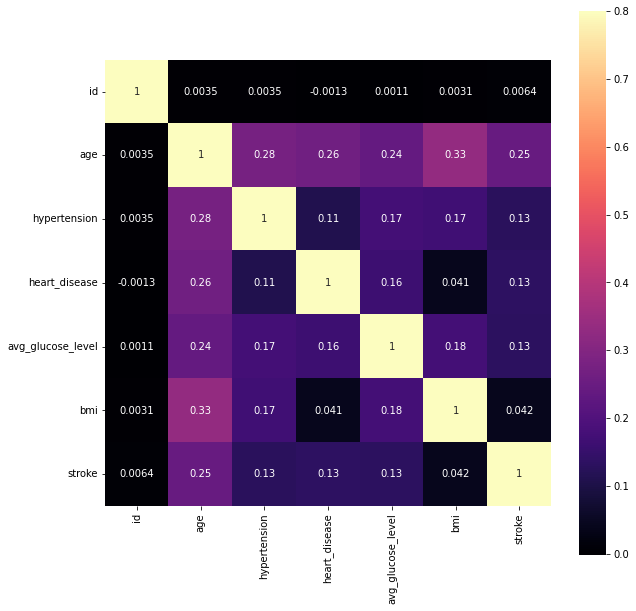

In [ ]:
corr=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,square=True,cmap='magma',annot=True)
plt.title=('Correlation variabel')

# cleaning

In [ ]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# ubah gender ke kategori
# ever-merried ke kategori
# work type ke kaetgori
# residence type ke kategori
# smoking sttaus ke kategori


In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Drop row
dataset.drop(dataset.index[dataset['gender'] == 'Other'], inplace=True)

# Reset index of dataframe
dataset = dataset.reset_index(drop = True)

In [ ]:
dataset['gender'] = dataset['gender'].astype('category').cat.codes
dataset['ever_married'] = dataset['ever_married'].astype('category').cat.codes
dataset['work_type'] = dataset['work_type'].astype('category').cat.codes
dataset['Residence_type'] = dataset['Residence_type'].astype('category').cat.codes
dataset['smoking_status'] = dataset['smoking_status'].astype('category').cat.codes
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5105,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5106,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5107,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
#dataset = dataset[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].astype('category')

In [ ]:
#dataset = dataset.astype({'gender' : 'category', 'ever_married' : 'category', 'work_type' : 'category', 'Residence_type' : 'category', 'smoking_status' : 'category' })

In [ ]:
dataset.dtypes

id                     int64
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
stroke                 int64
dtype: object

In [ ]:
dataset = dataset.dropna()
# Reset index of dataframe
dataset = dataset.reset_index(drop = True)

In [ ]:
dataset.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
dataset.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4903,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
4904,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
4905,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
4906,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0
4907,44679,0,44.0,0,0,1,0,1,85.28,26.2,0,0


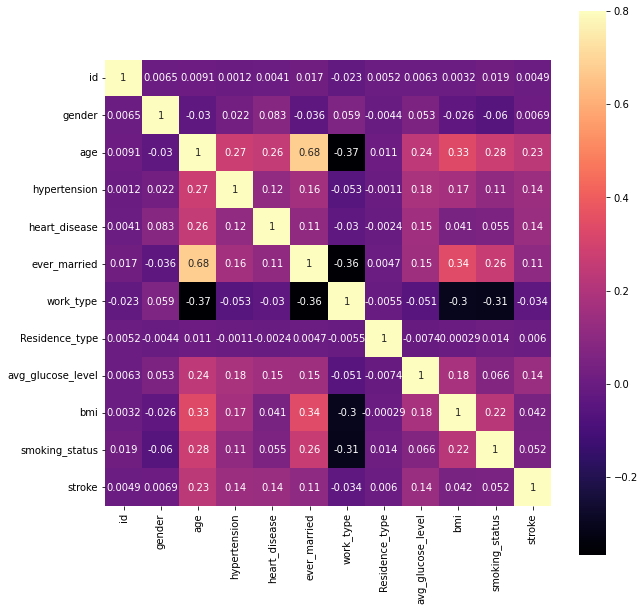

In [ ]:
corr=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,square=True,cmap='magma',annot=True)
plt.title=('Correlation variabel')

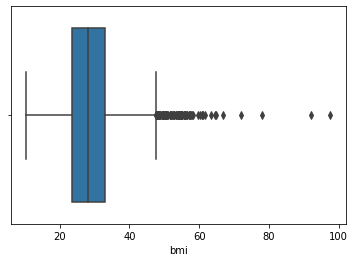

In [ ]:
import seaborn as sns
sns.boxplot(x=dataset['bmi'])

In [ ]:
# Display rows with 'bmi' > 80
display(dataset[dataset['bmi'] > 70])

# Drop rows
dataset.drop(dataset.index[dataset['bmi'] > 70], inplace=True)

# Reset index of dataframe
dataset = dataset.reset_index(drop = True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
498,545,1,42.0,0,0,1,2,0,210.48,71.9,2,0
872,41097,0,23.0,1,0,0,2,1,70.03,78.0,3,0
2019,56420,1,17.0,1,0,0,2,0,61.67,97.6,0,0
4029,51856,1,38.0,1,0,1,2,0,56.90,92.0,2,0


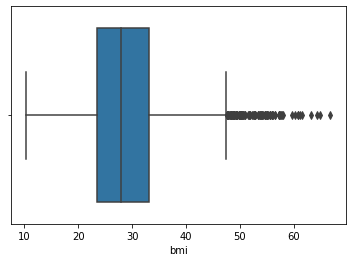

In [ ]:

sns.boxplot(x=dataset['bmi'])

# Split data 

In [ ]:
dataset.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4899,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
4900,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
4901,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
4902,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0
4903,44679,0,44.0,0,0,1,0,1,85.28,26.2,0,0


In [ ]:
# colum = ['stroke']
# X = dataset[colum]
# y = dataset.stroke

In [ ]:
colum = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
X = dataset[colum]
y = dataset.stroke

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# decision tree

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print('Precision : ', np.round(metrics.precision_score(y_test, y_pred)))

Precision :  0.0


In [ ]:
print('recall : ', np.round(metrics.recall_score(y_test, y_pred)))

recall :  0.0


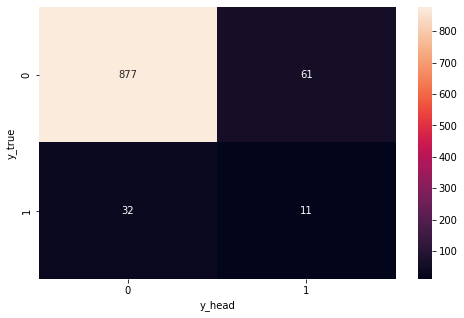

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [ ]:
print('Recal : {}'.format(recall_score(y_test, y_pred)))

Recal : 0.23255813953488372


In [ ]:
# result = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(result)

result1 = classification_report(y_test, y_pred)
print('Classification report:')
print(result1)

result2 = accuracy_score(y_test, y_pred)
print('Accuracy:', result2)

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       938
           1       0.15      0.26      0.19        43

    accuracy                           0.91       981
   macro avg       0.56      0.60      0.57       981
weighted avg       0.93      0.91      0.92       981

Accuracy: 0.9051987767584098


# naive bayes

In [ ]:
clf_naivebayes = GaussianNB()
clf_naivebayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = clf_naivebayes.predict(X_test)

In [ ]:
result_naivebayes = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', result_naivebayes)

result1_naivebayes = classification_report(y_test, y_pred)
print('Classification report:', result1_naivebayes)

result2_naivebayes = accuracy_score(y_test, y_pred)
print('Accuracy:', result2_naivebayes)

Confusion Matrix: [[823 115]
 [ 22  21]]
Classification report:               precision    recall  f1-score   support

           0       0.97      0.88      0.92       938
           1       0.15      0.49      0.23        43

    accuracy                           0.86       981
   macro avg       0.56      0.68      0.58       981
weighted avg       0.94      0.86      0.89       981

Accuracy: 0.8603465851172273


# logistikregresi

In [ ]:
clf_regresi = LogisticRegression()
clf_regresi.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = clf_regresi.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred, normalize=False)

938

In [ ]:
result_regresi = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', result_regresi)

result1_regresi = classification_report(y_test, y_pred)
print('Classification report:', result1_regresi)

result2_regresi = accuracy_score(y_test, y_pred)
print('Accuracy:', result2_regresi)

Confusion Matrix: [[938   0]
 [ 43   0]]
Classification report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       938
           1       0.00      0.00      0.00        43

    accuracy                           0.96       981
   macro avg       0.48      0.50      0.49       981
weighted avg       0.91      0.96      0.93       981

Accuracy: 0.9561671763506626


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
